In [11]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
import tensorflow as tf
from tensorflow import keras
import pickle
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load features and labels data

with open('aapl_two_gram_features_labelled_df.pkl', 'rb') as f:
    labelled_aapl_news_df = pickle.load(f)

In [3]:
trainX_df=labelled_aapl_news_df['features']
trainY_df=labelled_aapl_news_df['label']

trainX = np.stack(trainX_df)

trainY_df=trainY_df.astype('int')
trainY = np.stack(trainY_df)

print(trainX.shape)
print(trainY.shape)
trainX

(71941, 3831)
(71941,)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
pca = PCA(n_components=3800)
pComponents= pca.fit_transform(trainX)
print(pca.explained_variance_ratio_)
sum([float(x) for x in pca.explained_variance_ratio_])

[8.01939841e-02 4.59203231e-02 3.82233813e-02 ... 7.04995361e-34
 7.04995361e-34 7.04995361e-34]


1.0000000000000004

In [5]:
X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, test_size=0.2, random_state=23)

In [6]:
print(X_train.shape)
print(y_train.shape)

(57552, 3831)
(57552,)


In [8]:
print("training Logistic Regression now ...")

logistic_regression = LogisticRegression(max_iter=1000, verbose=15, n_jobs=-1).fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)

In [9]:
acc = accuracy_score(y_test,y_pred)
print('Accuracy of Logistic Regression classifier is: %f ' % acc)

Accuracy of Logistic Regression classifier is: 0.598652 


In [16]:
print("training Random Forest classifier now ...")

random_forest_classifier = RandomForestClassifier(n_estimators=100, verbose=15, n_jobs=-1).fit(X_train,y_train)
#increase n_estimators if you face issues in training
y_pred=random_forest_classifier.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print('Accuracy of Random Forest classifier is: %f ' % acc)

training Random Forest classifier now ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 222.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy of Random Forest classifier is: 0.678157 


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   45.1s finished


In [4]:
print("current time:-", datetime.datetime.now())

pca = PCA(n_components=1500)
pComponents= pca.fit_transform(trainX)
print(pca.explained_variance_ratio_)
print(sum([float(x) for x in pca.explained_variance_ratio_]))

X_train, X_test, y_train, y_test = train_test_split(pComponents, trainY, test_size=0.2, random_state=23)
print(X_train.shape)
print(y_train.shape)

print("training SVM classifier now ...")

svm_classifier = svm.SVC(verbose=12).fit(X_train,y_train)
y_pred = svm_classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy of SVM classifier is: %f ' % acc)
print("current time:-", datetime.datetime.now())

current time:- 2021-04-05 14:56:09.711582
[0.08019398 0.04592032 0.03822338 ... 0.00010264 0.00010252 0.00010225]
0.8816114817322985
(57552, 1500)
(57552,)
training SVM classifier now ...
[LibSVM]Accuracy of SVM classifier is: 0.619223 
current time:- 2021-04-05 17:10:51.641437


In [ ]:
pca = PCA(n_components=1500)
pComponents= pca.fit_transform(trainX)
print(sum([float(x) for x in pca.explained_variance_ratio_]))

#X_train, X_test, y_train, y_test = train_test_split(pComponents, trainY, test_size=0.15, random_state=23)

0.881605282561964
training Deep Neural Network now ...
current time:- 2021-04-05 19:46:15.355764
Epoch 1/50
10791/10791 [==============================] - 58s 5ms/step - loss: -16133.4768 - accuracy: 0.0195 - val_loss: -115413.3281 - val_accuracy: 0.0060
Epoch 2/50
10791/10791 [==============================] - 57s 5ms/step - loss: -532646.9718 - accuracy: 0.0243 - val_loss: -810780.1875 - val_accuracy: 0.0062
Epoch 3/50
10791/10791 [==============================] - 58s 5ms/step - loss: -2654629.8029 - accuracy: 0.0238 - val_loss: -2560511.5000 - val_accuracy: 0.0065
Epoch 4/50
10791/10791 [==============================] - 58s 5ms/step - loss: -7544641.7719 - accuracy: 0.0247 - val_loss: -5804017.0000 - val_accuracy: 0.0064
Epoch 5/50
10791/10791 [==============================] - 58s 5ms/step - loss: -15397657.3547 - accuracy: 0.0251 - val_loss: -11014126.0000 - val_accuracy: 0.0063
Epoch 6/50
10791/10791 [==============================] - 58s 5ms/step - loss: -28942600.1794 - accur

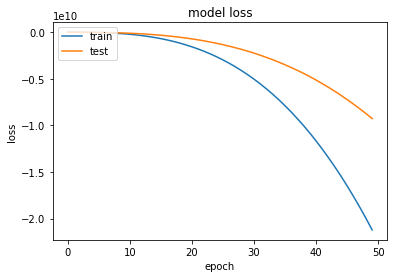

In [12]:
print("training Deep Neural Network now ...")

dnn_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1500,)),
    keras.layers.Dense(1000, activation=tf.nn.relu),
    keras.layers.Dense(150, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("current time:-", datetime.datetime.now())
history = dnn_model.fit(pComponents, trainY, validation_split=0.25, epochs=50, batch_size=5)

# list all data in history
print(history.history.keys())

#test_loss, test_acc = dnn_model.evaluate(X_test, y_test)
#print('Accuracy of Deep Neural Network is: %f ' % test_acc)
print("current time:-", datetime.datetime.now())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()